<a href="https://colab.research.google.com/github/agerexx/meeteu_24-25/blob/main/Machine_Learning_MEET_EU_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
We are going to use **Python** to build our machine learning model. Python is a programming language and we are using Google Colab to run (execute) our Python code. Google Colab allow us to share a notebook (like this one, titled "Machine Learning - MEET-EU Group1") were we can write in Python (code cells) but we can also write normal text (text cells), like this section. All the cells can be executed one by one. To execute one cell you can either click the triangle on the left of the cell or use Shift+Enter.

We will use some very popular **Python libraries**. Normally, a library is a collection of books or is a room or place where many books are stored to be used later. Similarly, in the programming world, a library is a collection of precompiled codes that can be used later on in a program for some specific well-defined operations. Libraries need to be imported before use. This is tipically done at the very beginning of the code, in the `import` statements. With *as* we can specify with which abbreviation we are referring to that library later in the code.

**Pandas**: import .csv, .xlsx and other file formats, deal with tabular data and perform data analysis (usual abbreviation: pd)

**Scikit-Learn**: machine learning

**Seaborn**: we can draw some graphs if you get interested in use it (usual abbreviation: sns)

For example, we will use `pd.read_csv` to read a *.csv* file. This formula means that we are using the function *read_csv* from the library *pandas* (abbreviated as *pd*).

The symbol # is used to add comments. This means that what comes after the # is not code, but just a line of text we are adding to the code, usually as an explanation of what we are doing or as the title of a section of code.

With the symbol = we are assigning the value to a variable. What comes before the = is the name of the variable (in our case, you'll be free to choose all the names of the variables, but it is useful to assign names that help you remind what these variable represents).

# Input file
We need to pass to the model our input data. Let's start with the BEST approach: for each molecule we use only the scores of the best pose (*_conf_01* in VEGA ZZ).
The data is formatted as a table:


*   each row is a molecule (best pose). In our cases, we have 220 **samples** (or **instances**).
*   in the columns we have the scores of that pose calculated with RESCORE+ after the docking. These scores represents the **features**.

The output of RESCORE+ is *.csv* file, with semicolon (;) as separator between values and comma (,) as decimal separator. You can easily visualize the semicolon as separator by opening the *.csv* file with Notepad++ or WordPad etc. (text editors).
We will use **Pandas** to read the *.csv* file. Pandas is a very popular Python library for manipulating tabular data and time series.

In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/TrmD-Ligand_dataset_Rescore_BEST.csv', sep=';', decimal=',')

In [ ]:
df #"df" is a common abbreviation for "dataframe"

,Name,Activity,CHARMM,CVFF,ELECT,ELECTDD,MLPINS,MLPINS_2,MLPINS_3,MLPINS_F,...,PLANTS_PLP_NORM_HEVATMS,PLANTS_PLP_NORM_WEIGHT,PLANTS_PLP95,PLANTS_PLP95_NORM_HEVATMS,PLANTS_PLP95_NORM_WEIGHT,XS_HPScore,XS_HMScore,XS_HSScore,XS_Average,XS_Binding
0,135399632_conf_01,1,160.593613,220.173996,11.928267,-6.110229,9.989211,1.516066,0.279045,2.536279,...,-4.323750,-0.327527,-117.940002,-7.371250,-0.558377,6.06,6.22,6.16,6.15,-8.38
1,135680893_conf_01,1,111.362503,167.708008,2.816956,-7.120750,6.661478,1.050287,0.202826,1.958668,...,-4.493125,-0.337207,-123.410004,-7.713125,-0.578867,5.97,6.10,6.15,6.07,-8.28
2,135741302_conf_01,0,-34.179646,-50.901073,5.205505,-0.412341,12.493609,1.615600,0.250561,2.091102,...,-4.693530,-0.359023,-117.290001,-6.899412,-0.527758,6.39,6.56,6.31,6.42,-8.76
3,135992006_conf_01,1,-25.439795,-37.630264,-10.998873,-6.539066,7.315668,1.084061,0.188892,1.624900,...,-4.548125,-0.342919,-119.800003,-7.487500,-0.564542,5.89,6.05,6.10,6.02,-8.20
4,215639_conf_01,1,103.924835,108.271667,-2.586060,-7.046275,14.370072,2.126424,0.377780,3.344781,...,-4.406250,-0.308845,-113.330002,-7.083125,-0.496474,6.12,6.18,6.34,6.21,-8.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,P90271950_conf_01,0,171.721954,253.684906,2.790206,-0.282458,1.236820,-0.063826,-0.068001,-1.762261,...,-3.620000,-0.255672,-82.629997,-5.902143,-0.416855,5.16,5.48,5.42,5.35,-7.30
216,P92054619_conf_01,0,801.655823,1086.230469,-13.201235,-8.760930,21.831341,2.801310,0.384993,1.967305,...,-3.746429,-0.204003,-163.289993,-5.831786,-0.317557,6.95,7.17,7.08,7.07,-9.64
217,P92081331_conf_01,0,397055.281300,454517.937500,-69.771782,-23.035070,-30.466492,-3.388064,-0.280791,0.361408,...,0.505152,0.036439,-53.849998,-1.631818,-0.117711,6.54,6.39,6.41,6.45,-8.79
218,P96241614_conf_01,0,-8.612852,-11.971793,179.433395,16.630398,2.593791,0.406615,0.075503,1.017509,...,-4.693125,-0.295271,-117.650002,-7.353125,-0.462627,5.75,5.93,5.80,5.83,-7.95


# Index, features, class
The machine learning model doesn't need the names of the molecules to learn about them, but we need to keep these names to be later able to identitfy the molecules (to which molecule does each row of data corresponds?). We can set the names as the **index** of the table. The index is not considered as a normal column, so we won't need to exclude it from the features. In the below section of code, we are setting the column "Name" as the index of the dataframe.

A **feature** is a measurable property of some data-sample that is used as input for a ML model for training and predicting. In our case, the features are the scores of the rescoring. The machine learning model will be trained to predict if a molecule is active or not based on these features. When building a machine learning model, the features are the X variables, so we are defining X as our set of features (our scores from the rescoring).

The **class** is the label assigned to each sample. The machine learning model has to predict the label of each sample. In our case, the classes are two: active molecules and inactive molecules. Since we have just two classes, our task is defined as binary classification (the model has to predict to which class each sample belongs and the classes are only two). When building a machine learning model, the class to be predicted is the y variable, so we are defining y the "Activity" column.

In [ ]:
df.set_index("Name", inplace=True)

In [ ]:
X = df.loc[:, "CHARMM":"XS_Binding"]

In [ ]:
X

,CHARMM,CVFF,ELECT,ELECTDD,MLPINS,MLPINS_2,MLPINS_3,MLPINS_F,Contacts,Contacts_NORM_HEVATMS,...,PLANTS_PLP_NORM_HEVATMS,PLANTS_PLP_NORM_WEIGHT,PLANTS_PLP95,PLANTS_PLP95_NORM_HEVATMS,PLANTS_PLP95_NORM_WEIGHT,XS_HPScore,XS_HMScore,XS_HSScore,XS_Average,XS_Binding
Name,,,,,,,,,,,,,,,,,,,,,
135399632_conf_01,160.593613,220.173996,11.928267,-6.110229,9.989211,1.516066,0.279045,2.536279,14,0.875000,...,-4.323750,-0.327527,-117.940002,-7.371250,-0.558377,6.06,6.22,6.16,6.15,-8.38
135680893_conf_01,111.362503,167.708008,2.816956,-7.120750,6.661478,1.050287,0.202826,1.958668,13,0.812500,...,-4.493125,-0.337207,-123.410004,-7.713125,-0.578867,5.97,6.10,6.15,6.07,-8.28
135741302_conf_01,-34.179646,-50.901073,5.205505,-0.412341,12.493609,1.615600,0.250561,2.091102,16,0.941176,...,-4.693530,-0.359023,-117.290001,-6.899412,-0.527758,6.39,6.56,6.31,6.42,-8.76
135992006_conf_01,-25.439795,-37.630264,-10.998873,-6.539066,7.315668,1.084061,0.188892,1.624900,12,0.750000,...,-4.548125,-0.342919,-119.800003,-7.487500,-0.564542,5.89,6.05,6.10,6.02,-8.20
215639_conf_01,103.924835,108.271667,-2.586060,-7.046275,14.370072,2.126424,0.377780,3.344781,12,0.750000,...,-4.406250,-0.308845,-113.330002,-7.083125,-0.496474,6.12,6.18,6.34,6.21,-8.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P90271950_conf_01,171.721954,253.684906,2.790206,-0.282458,1.236820,-0.063826,-0.068001,-1.762261,11,0.785714,...,-3.620000,-0.255672,-82.629997,-5.902143,-0.416855,5.16,5.48,5.42,5.35,-7.30
P92054619_conf_01,801.655823,1086.230469,-13.201235,-8.760930,21.831341,2.801310,0.384993,1.967305,23,0.821429,...,-3.746429,-0.204003,-163.289993,-5.831786,-0.317557,6.95,7.17,7.08,7.07,-9.64
P92081331_conf_01,397055.281300,454517.937500,-69.771782,-23.035070,-30.466492,-3.388064,-0.280791,0.361408,20,0.606061,...,0.505152,0.036439,-53.849998,-1.631818,-0.117711,6.54,6.39,6.41,6.45,-8.79


In [ ]:
y = df['Activity']

In [ ]:
y

,Activity
Name,
135399632_conf_01,1
135680893_conf_01,1
135741302_conf_01,0
135992006_conf_01,1
215639_conf_01,1
...,...
P90271950_conf_01,0
P92054619_conf_01,0
P92081331_conf_01,0


# Training set and test set
We need to divide our entire set (220 samples=110 actives + 110 inactives) to obtain a training set and a test set.

*   **Training set**: it is the data your machine learning model learns from. These data are labelled and during training we pass to the model both the features (X) and the class (y) of these samples. In this way, the model knows if each sample is active or not and learn to recognize patterns in the features to discriminate between active and inactive molecules.
*   **Test set**: based on what it has learned in the training phase, the model will predict the class (y) of these samples knowing only their features (X). Since we know the class (y) of these samples too, after the model prediction we can use the prediction itself to evaluate model's performance: was the model able to predict the correct label or not?

We use the function `train_test_split` from scikit-learn to divide the training set and the test set. We will split the data so that the 80% of it made up the training set, while the remaining 20% represents the test set. We will use the option `stratify=y`; a **stratified split** ensures that the proportion of each class (active/inactive) in the original dataset is preserved in both the training and testing sets. In our case, the proportion is 50:50 because our dataset is balanced.

`shuffle=True` is used to scramble the order of the samples before performing the splitting and this is useful to ensure the randomness in data distribution.

`random_state=42` ensures that the same randomization is used each time you run the code, resulting in the same splits of the data. This is in general the purpose of random state: while this number remains the same, the output of a random operation remains the same. The random state can be any number and you can choose the number you want. The only thing that you have to remember is to use the same number if you want to reproduce the exact same output. If you have a lucky number is your time to speak up and we will use it as random state to bring luck to our project ;)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, shuffle=True, random_state=42)

# Accuracy
Using sklearn we can use different metrics to evaluate the performance of our model. Accuracy is the default scoring metric for Random Forest in scikit-learn and it is calculated according to the formula:
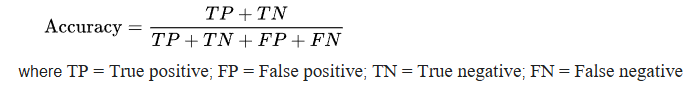

We are working with binary classification, so we just have two classes, that are generalized as True/False in the formula. Let's say that True is class 1 (Active) and False is class 0 (inactive).
To add some clarity:
*   True positive: the molecules that are active (1) and are correctly predicted as active (1)
*   True negative: the molecules that are inactive (0) and are correctly predicted as inactive (0)
*   False positive: the molecules that are inactive (0) but are wrongly predicted as active (1)
*   False negative: the molecules that are active (1) but are wrongly predicted as inactive (0).

The accuracy can be bewteen 0 and 1. Accuracy of 0 means means the model got all the predictions wrong. Accuracy of 0.5 is the equivalent of random guessing, if the classes are balanced, as in our case. Accuracy of 1 means the model got all the predictions right.

# Model initialization
We need to initialize a machine learning model. We'll try to use Random Forest as first approach, with default parameters.

We are performing a classification: the model need to predict the class (label) of each sample. So, we need the `RandomForestClassifier` from sklearn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Cross validation
**We will perform the training in cross-validation.** This is a way to combine the training and the validation step using the entire training set. The validation is different from testing.

*   **Validation set**: used iteratively during model training for performance monitoring and hyperparameter tuning. It is used to asses the model's performance during training and choose the hyperparameters if the hyperparameter tuning is performed.
*   **Test set**: typically used only once, after model development. It is used to evaluate the final model's performance.

So, a part from the training set and the test set, we would need only a validation set. But divide our entire dataset (220 sampels) in three sets would reduce too much the data to train on. As a solution: we use cross-validation.

1.   Split the data (the data in this case is the training set, which is 80% of the entire dataset): divide the training set into folds (eg. 5 parts)
2.  Training + Validations: the model is trained on 4 folds, while the 5th left-out fold is used for validation (the model is trained on 4 folds and then based on what it has learned it predicts the class (y) of the 5th fold).
3.  Repeat: rotate which fold is used for validation until every fold has been used once.
4.  Average the results: combine the validation results to get an overall performance score.

**Cross-validation** is a way to check how well a machine learning model will perform on unseen data while still developing it. It splits your data into parts to train the model on one part and validate it on another.

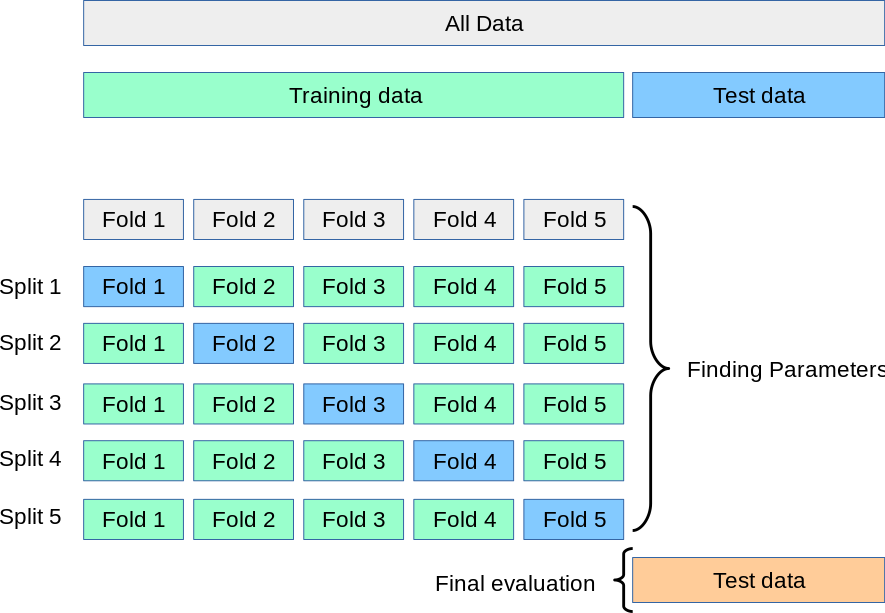

To create the folds, we use `KFold` from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=5)

We then use `cross_val_score` to evaluate the performance of the base model in cross-validation, passing the division in folds we just made (cv).

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)

array([0.80555556, 0.74285714, 0.88571429, 0.85714286, 0.65714286])

In [ ]:
cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv).mean()

0.7896825396825398

# Feature selection
We checked the performance of a base Random Forest model when trained on our training set using cross-validation.
We will now try to increment the performance of the model. The first step to do that is **feature selection**. With feature selection why are trying to keep only the most informative features (columns=rescoring scores=the info the model uses to guess if a molecules is active or not) and this is useful because:

*   Decreases over-fitting: **overfitting** is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. In overfitting, a model memorizes the training set so closely that it fails to make prediction on new unseen data. In this case, the model it's like a student that memorizes the lesson by-heart: they are very good if the question was written in the book they studied from, but they can't generalize to answer a new question on the subject.
*   Improves Accuracy: less misleading data means better modeling accuracy. With feature selection we are trying to reduce the "noise" that can confuse the model.
*   Reduces Training Time: less data means quicker algorithms.

Usually feature selection is a trade-off between accuracy of the selection and time needed for the selection. Since we have quite a few features in total, we can choose a quite extensive feature selection: `SequentialFeatureSelector` from sklearn.

**Sequential feature selection** can be performed in two directions: forward or backward. Let's explain forward feature selection. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the `n_features_to_select` parameter.

Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

**How to choose how many features to keep?**
Here I used `SequentialFeatureSelector` to figure out how many features our model should use for the best performance. The process starts with no features and adds them one at a time, choosing the most useful features at each step. For every number of features (from 1 to 25 which is the total number of features) the method evaluates different feature combinations and finds the set that works best for that specific number. For that best set of features, the average cross-validation score is plotted.

In our case, we see in the plot that a plateau is reached quite soon: with 3 features the accuracy has already reach the plateau. However, we will try with 7 features, since there seems to be a peak.

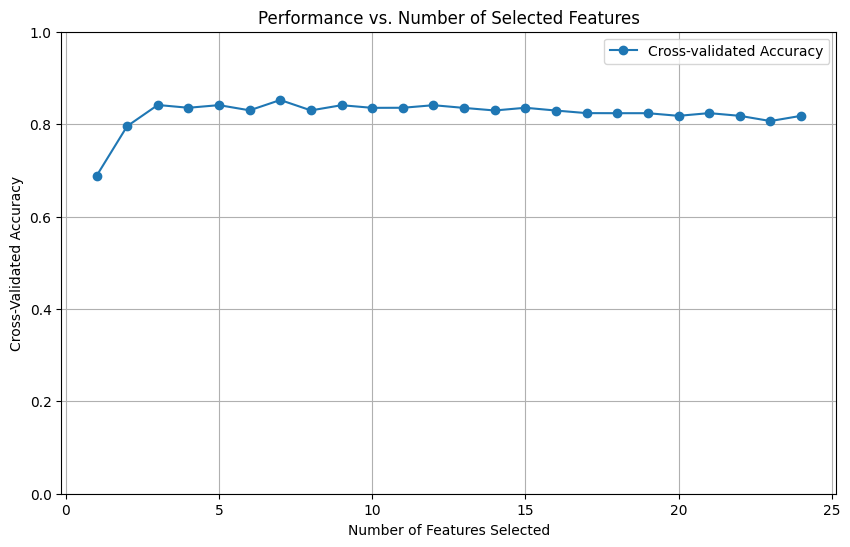

In [ ]:
## This is the code I used to perform the Sequential Feature Selection by setting n_features_to_select on all the possible values between 1 and 25.
## Below I plotted the results using matplotlib
## We don't run the code during the meeting because it takes quite a lot of time, but you can try to run it on you pc!
import numpy as np
import matplotlib.pyplot as plt

scores = []
num_features = range(1, 26)

for n in num_features:
    sfs = SequentialFeatureSelector(
        model, n_features_to_select=n, direction='forward', cv=5, n_jobs=-1
    )
    sfs.fit(X_train, y_train)
    selected_features = sfs.get_support()
    X_train_selected = X_train.loc[:, selected_features]
    score = cross_val_score(model, X_train_selected, y_train, cv=5).mean()
    scores.append(score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(num_features, scores, marker='o', label='Cross-validated Accuracy')
plt.title('Performance vs. Number of Selected Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

NameError: name 'SequentialFeatureSelector' is not defined

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=7, direction='forward', scoring='accuracy', cv=cv)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=7, scoring='accuracy')

In [ ]:
# Transform X_train and X_test to include only the selected features
selected_features_mask = sfs.get_support()
selected_features = X_train.columns[selected_features_mask]

X_train_selected = X_train.loc[:, selected_features]  # Transform X_train
X_test_selected = X_test.loc[:, selected_features]    # Transform X_test

# Print the selected feature names
print("Selected features:", list(selected_features))

Selected features: ['ELECTDD', 'MLPINS', 'MLPINS_2', 'MLPINS_F', 'PLANTS_CHEMPLP', 'PLANTS_PLP', 'PLANTS_PLP_NORM_HEVATMS']


In [ ]:
X_train_selected

,ELECTDD,MLPINS,MLPINS_2,MLPINS_F,PLANTS_CHEMPLP,PLANTS_PLP,PLANTS_PLP_NORM_HEVATMS
Name,,,,,,,
P138790143_conf_01,-44.679291,-47.757435,-7.804043,-16.975895,-82.089996,-71.610001,-4.212353
73334354_conf_01,-7.473298,2.729882,0.504996,1.486216,-98.080002,-80.580002,-4.029000
CHEMBL5268562_conf_01,-6.121759,14.420610,1.807315,0.276179,-91.769997,-82.199997,-3.288000
CHEMBL4578960_conf_01,-7.493922,39.746140,5.494133,5.964097,-107.330002,-96.860001,-3.124516
73334467_conf_01,-13.551156,20.854305,2.926596,3.271702,-88.330002,-73.470001,-2.825769
...,...,...,...,...,...,...,...
CHEMBL5283911_conf_01,-8.029125,8.881765,1.134424,0.371598,-93.160004,-80.220001,-4.456667
P90271950_conf_01,-0.282458,1.236820,-0.063826,-1.762261,-52.459999,-50.680000,-3.620000
CHEMBL5277663_conf_01,-2.340139,0.685609,0.058080,-0.174219,-94.800003,-84.680000,-3.387200


In [ ]:
X_test_selected

,ELECTDD,MLPINS,MLPINS_2,MLPINS_F,PLANTS_CHEMPLP,PLANTS_PLP,PLANTS_PLP_NORM_HEVATMS
Name,,,,,,,
GTC000450A_conf_01,-1.772487,26.985506,3.584370,4.096037,-80.379997,-76.900002,-2.480645
CHEMBL5290255_conf_01,-5.268515,1.803596,0.100131,-1.316254,-90.449997,-80.160004,-3.083077
73334257_conf_01,-4.922662,8.580222,1.228414,1.781358,-97.699997,-82.730003,-4.136500
CHEMBL5267738_conf_01,-9.720703,18.764698,2.600189,2.487477,-93.559998,-83.370003,-3.087778
CHEMBL5289815_conf_01,-7.389135,10.416119,1.219730,-0.339908,-96.519997,-81.080002,-3.525218
73334577_conf_01,-14.883448,0.357250,0.007367,-0.614993,-110.599998,-92.830002,-3.713200
P74793485_conf_01,2.551950,15.887740,2.039559,1.473537,-62.830002,-70.290001,-3.514500
CHEMBL4447065_conf_01,-36.967201,-33.679058,-6.396847,-20.681557,-109.269997,-91.870003,-3.402593
73334687_conf_01,-34.299202,-42.570538,-7.702153,-21.910854,-110.110001,-85.720001,-2.857333


In [ ]:
cross_val_score(model, X_train_selected, y_train, cv=cv)

array([0.86111111, 0.82857143, 0.91428571, 0.88571429, 0.71428571])

In [ ]:
cross_val_score(model, X_train_selected, y_train, cv=cv).mean()

0.8407936507936509

# Hyperparameter tuning

After feature selection, another operation we can perform to enhance the model performance is **hyperparameter tuning**.

Random Forest is like a group of decision-making experts (decision trees). Each expert giver their opinion (a prediction), and the Random Forest combines these opinions to make a final decision. This teamwork helps make more reliable predictions.

**hyperparameters** are like settings or rules you set before the forest starts growing. These rules control how the experts (trees) behave and work together. Examples of these settings include:

*   How many trees you want in your forest: `n_estimators`
*   How deep each tree is allowed to grow: `max_depth`
*   How many features each tree shold look at when making decisions: `max_features`

Hyperparameter tuning is the process of trying different settings to find the best combination. You try different settings (different combination of hyperparameters) and pick the ones that make the model perform the best; in other words, we train the model with different combinations of hyperparameter and validate it (using the training set in cross-validation). We will pick the model with the best cross-validation score.

If you want to learn more about Random Forest parameters: https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92

`GridSearchCV` is a tool of scikit-learn that can automate this process by testing many combinations and finding the best one. Using the option `refit=True`, the function refit the model using the best found parameters on the whole dataset. So at the end of th grid search we have the model ready to make predictions.


In [ ]:
# default params: n_estimators=100, max_depth=None, max_features='sqrt'
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [None, 3, 5, 7],
              'max_features': ['sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, refit=True)

In [ ]:
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
grid_search.best_score_  # mean cross-validated score of the best_estimator

0.8522222222222222

In [ ]:
grid_search.best_params_ # parameter setting that gave the best results

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
best_model = grid_search.best_estimator_

# Test

We finally use the developed model to predict the activity of the molecules in the test set. We will thus evaluate the performance of the model on unseen data (this data have not been used during feature selection, hypesparameter tuning and training). Remember that also for the test set we consider only the features we selected with feature selection (otherwise you receive an error because the model have been trained with some features and then has to predict using other features).

In [ ]:
y_pred = best_model.predict(X_test_selected)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7727272727272727